In [4]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np

originalImage = cv2.imread('Cube.tif')
print('image shape is : '+str(originalImage.shape))

image shape is : (366, 409, 3)


In [5]:
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY ) 
  
#cv2.imshow('gray', image) 
print(grayImage.shape)
print(' Data type of a pixel : {}'.format(grayImage[ 100, 50].dtype))

(366, 409)
 Data type of a pixel : uint8


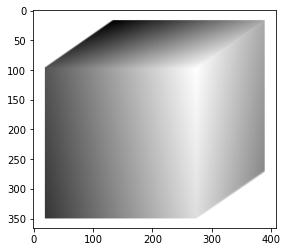

In [6]:
plt.imshow(grayImage , cmap = 'gray')

In [12]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [69]:
def scaling_func(image , n):
    i = 0
    j = 0 
    upscale = 2**n - 1
    result = np.zeros(image.shape)
    
    if(len(image.shape) == 2):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                result[i][j] = translate(image[i][j], 0, 255, 0, upscale)

                
    else:
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                for k in range(image.shape[2]):
                    result[i][j][k] = translate(image[i][j][k], 0, 255, 0, upscale)

    return result.astype(np.uint8)
        

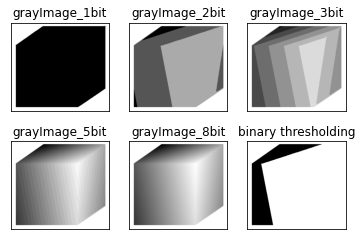

In [76]:
grayImage_1bit= scaling_func(grayImage,1)
grayImage_2bit= scaling_func(grayImage,2)
grayImage_3bit= scaling_func(grayImage,3)
grayImage_5bit= scaling_func(grayImage,5)
grayImage_8bit= scaling_func(grayImage,8)
ret,thresh = cv2.threshold(grayImage,127,255,cv2.THRESH_BINARY)
fig, axs = plt.subplots(2, 3)

titles = ['grayImage_1bit','grayImage_2bit','grayImage_3bit','grayImage_5bit','grayImage_8bit','binary thresholding']
images = [grayImage_1bit, grayImage_2bit, grayImage_3bit, grayImage_5bit, grayImage_8bit, thresh]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [77]:
cv2.imwrite("9623097-3.jpg", thresh) 

True